# Sentiment Analysis
Sentiment analysis using decision tree classifier
* baseline model
* hyperparameter tuning
* tuned model

## Import and install required libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## Read dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/train_aug.csv')

train_df.head()

,clean_text,manual_label
0,meebit bought eth usd blur meebits meebitsnft,pos
1,check tyler nft weekly preview analyzes market...,neu
2,meebits triple floor check opensea listing flo...,neu
3,clonex sold eth previously sold eth nft collec...,pos
4,mutant ape yacht club sold weth previously sol...,pos


In [4]:
X_train, y_train = train_df['clean_text'], train_df['manual_label']

In [5]:
test_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/test.csv')

test_df.head()

,clean_text,manual_label
0,day mapo tofu healthy meal mean tofu got ta co...,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu
2,nft lending agreement benddao ethereum reserve...,pos
3,meebit bought eth usd blur meebits meebitsnft,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos


In [6]:
X_test, y_test = test_df['clean_text'], test_df['manual_label']

In [7]:
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [8]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

## Baseline decision tree model

In [9]:
DT_classifier = DecisionTreeClassifier()

DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [10]:
t0 = time.time()

DT_classifier = DecisionTreeClassifier().fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [11]:
print("Training time: %fs" % (time_linear_train))

Training time: 0.569025s


In [12]:
y_pred=DT_classifier.predict(X_test_vectorized)

In [13]:
print(accuracy_score(y_test, y_pred))

0.76


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.35      0.38      0.36        21
         neu       0.61      0.66      0.63       102
         pos       0.86      0.83      0.84       277

    accuracy                           0.76       400
   macro avg       0.60      0.62      0.61       400
weighted avg       0.77      0.76      0.76       400



## Hyperparameter tuning

* max_depth
* min_samples_split
* min_samples_leaf
* criterion 

### max_depth

In [16]:
param_grid = { 
    "max_depth": [1, 3, 5, 7, 9]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [17]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [18]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.6443
The best hyperparameters are {'max_depth': 9}


### min_samples_split

In [19]:
param_grid = { 
    "max_depth": [9],
    "min_samples_split" : [2, 4, 6, 8, 10]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [20]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [21]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.6497
The best hyperparameters are {'max_depth': 9, 'min_samples_split': 10}


### min_samples_leaf

In [22]:
param_grid = { 
    "max_depth": [9],
    "min_samples_split" : [10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [23]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [24]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.6486
The best hyperparameters are {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}


### criterion

In [25]:
param_grid = { 
    "max_depth": [9],
    "min_samples_split" : [10],
    "min_samples_leaf": [1],
    "criterion": ['gini', 'entropy']
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [26]:
grid_search = GridSearchCV(estimator=DT_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [27]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.6487
The best hyperparameters are {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}


## Tuned decision tree model

In [28]:
t0 = time.time()

DT_classifier_tuned = DecisionTreeClassifier(
    criterion = 'gini',  
    max_depth = 9, 
    min_samples_leaf = 1, 
    min_samples_split = 10, 
    ).fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [29]:
DT_classifier_tuned.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
print("Training time: %fs" % (time_linear_train))

Training time: 0.052056s


In [31]:
y_pred=DT_classifier_tuned.predict(X_test_vectorized)

In [32]:
print(accuracy_score(y_test, y_pred))

0.7575


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.54      0.62      0.58        21
         neu       0.67      0.35      0.46       102
         pos       0.79      0.92      0.85       277

    accuracy                           0.76       400
   macro avg       0.67      0.63      0.63       400
weighted avg       0.74      0.76      0.74       400



## Apply on full dataset

In [34]:
df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/full_dataset_final.csv')

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k


In [35]:
df.isnull().values.any()

False

In [36]:
full_vectors = vectorizer.transform(df['clean_text'])

In [37]:
full_prediction_linear = DT_classifier_tuned.predict(full_vectors)

In [38]:
df['decision_tree'] = full_prediction_linear.tolist()

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,decision_tree
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [39]:
total_counts = len(df.index)

total_counts

20295

In [40]:
counts = df['decision_tree'].value_counts()

counts

pos    16950
neu     2084
neg     1261
Name: decision_tree, dtype: int64

<Axes: >

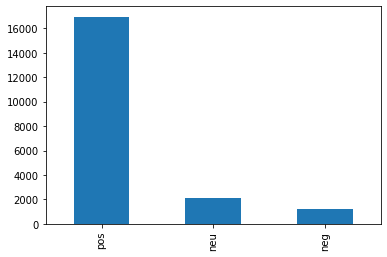

In [41]:
df['decision_tree'].value_counts().plot.bar()

In [42]:
df.to_csv('decision_tree_full_dataset.csv', index = False)